<a href="https://colab.research.google.com/github/Daisy-Deka/Blood-group-detection-using-fingerprint/blob/main/OpenCV_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!pip install opencv-python matplotlib

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files


Saving Shaniwad wada.jpg to Shaniwad wada (1).jpg


(np.float64(-0.5), np.float64(719.5), np.float64(1279.5), np.float64(-0.5))

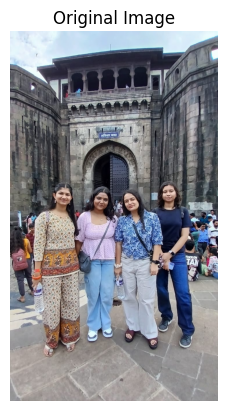

In [11]:
uploaded = files.upload()
image_path = next(iter(uploaded))
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.title("Original Image")
plt.axis("off")


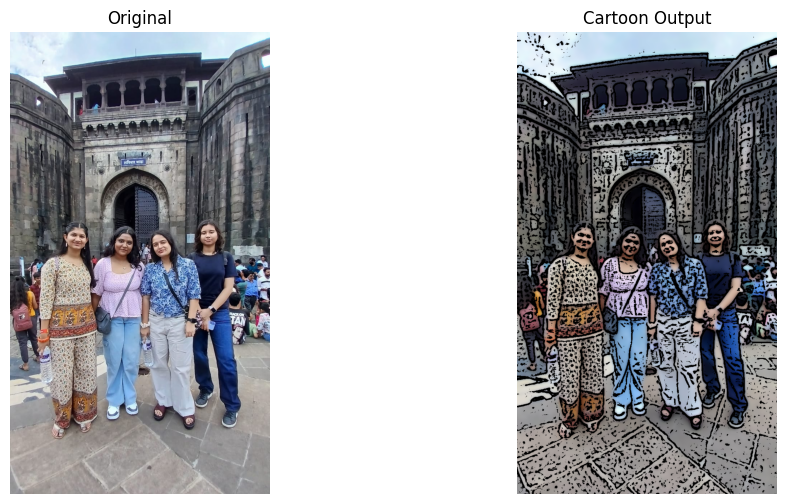

In [12]:
# Step 1 - Noise Reduction + Smoothen
color = img
for _ in range(3):  # Apply bilateral filter multiple times for smooth cartoon effect
    color = cv2.bilateralFilter(color, d=9, sigmaColor=250, sigmaSpace=250)

# Step 2 - Convert to Gray & Apply Median Blur
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray_blur = cv2.medianBlur(gray, 7)

# Step 3 - Adaptive Threshold to Detect Strong Edges
edges = cv2.adaptiveThreshold(
    gray_blur, 255,
    cv2.ADAPTIVE_THRESH_MEAN_C,
    cv2.THRESH_BINARY,
    blockSize=9,
    C=2
)

# Step 4 - Combine Cartoon Edges + Smoothed Colors
edges_colored = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)
cartoon = cv2.bitwise_and(color, edges_colored)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1); plt.imshow(img); plt.title("Original"); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(cartoon); plt.title("Cartoon Output"); plt.axis("off")
plt.show()


In [13]:
cartoon_bgr = cv2.cvtColor(cartoon, cv2.COLOR_RGB2BGR)
cv2.imwrite("high_quality_cartoon.jpg", cartoon_bgr)
print("✔ Saved output as: high_quality_cartoon.jpg")


✔ Saved output as: high_quality_cartoon.jpg
